In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (Mac의 경우)
mpl.rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

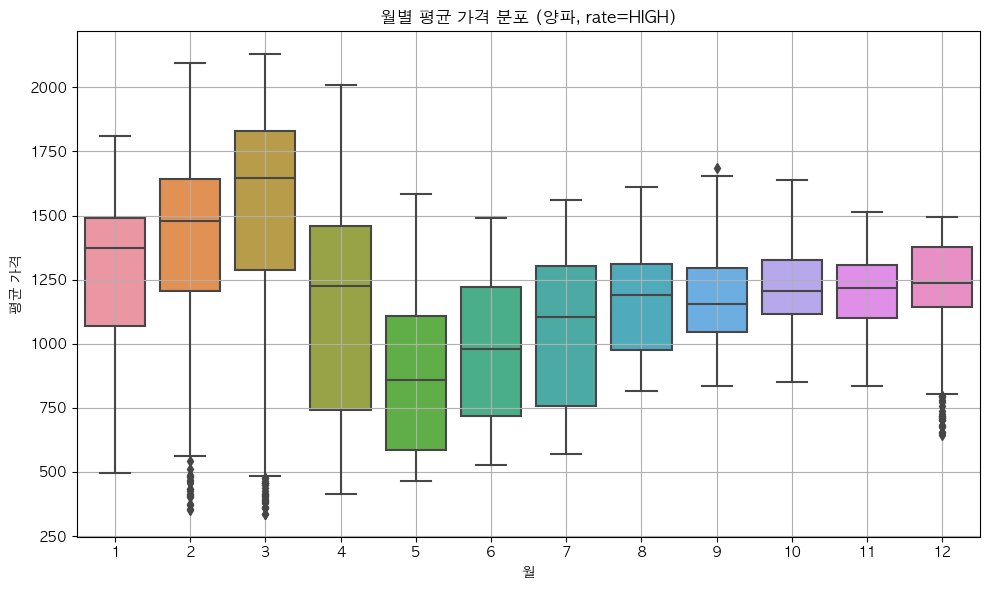

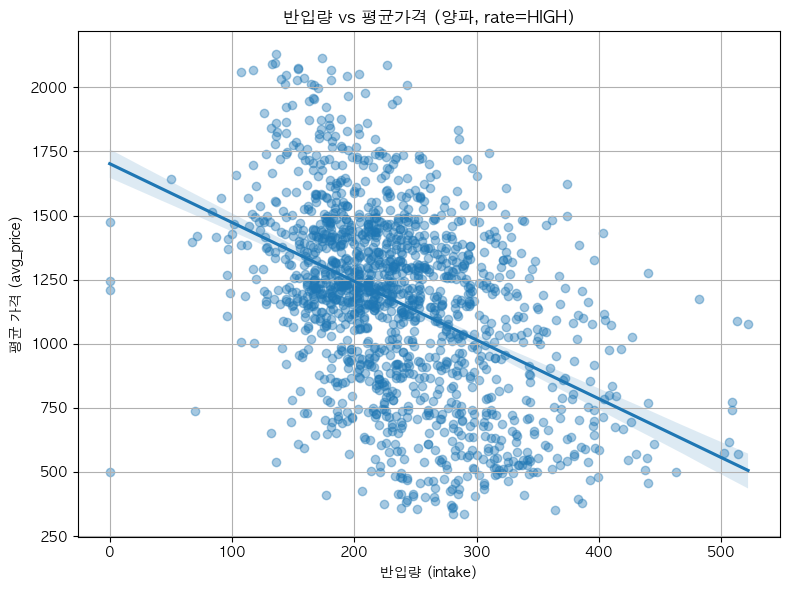

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 양파 데이터 불러오기
onion_df = pd.read_csv("onion_separated.csv")

# 'rate'가 'HIGH'인 데이터
high_df = onion_df[onion_df['rate'] == 'HIGH']

# 1번: 월별 평균 가격 분산 분석 (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=high_df, x='month', y='avg_price')
plt.title('월별 평균 가격 분포 (양파, rate=HIGH)')
plt.xlabel('월')
plt.ylabel('평균 가격')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2번: 평균 가격과 반입량(intake)의 상관관계 (산점도 + 회귀선)
plt.figure(figsize=(8, 6))
sns.regplot(data=high_df, x='intake', y='avg_price', scatter_kws={"alpha":0.4})
plt.title('반입량 vs 평균가격 (양파, rate=HIGH)')
plt.xlabel('반입량 (intake)')
plt.ylabel('평균 가격 (avg_price)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5번: 가격 급등/급락 시점 탐지 (gap 기준 상하위 5%)
gap_sorted = high_df.copy()
gap_sorted['abs_gap'] = gap_sorted['gap'].abs()
threshold = gap_sorted['abs_gap'].quantile(0.95)
extreme_gap_df = gap_sorted[gap_sorted['abs_gap'] >= threshold]




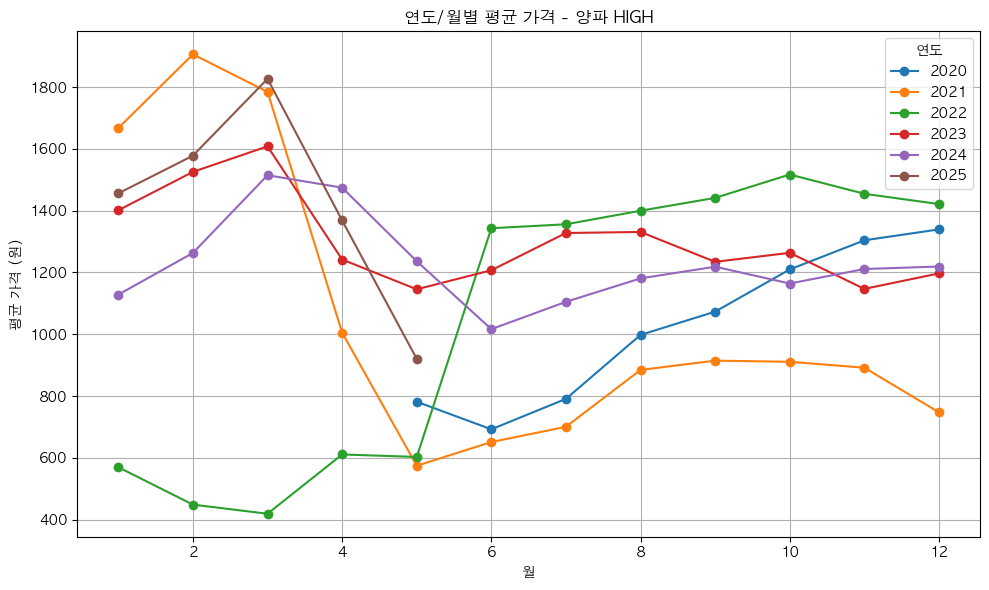

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 양파 HIGH 데이터 불러오기
onion_df = pd.read_csv("onion_separated.csv")
high_df = onion_df[onion_df['rate'] == 'HIGH']

# 연도/월별 평균 가격 계산
grouped_high = high_df.groupby(['year', 'month'])['avg_price'].mean().reset_index()

# 피벗 테이블 생성
pivot_high = grouped_high.pivot(index='month', columns='year', values='avg_price')

# 시각화
plt.figure(figsize=(10, 6))
for year in pivot_high.columns:
    plt.plot(pivot_high.index, pivot_high[year], label=str(year), marker='o')
plt.title('연도/월별 평균 가격 - 양파 HIGH')
plt.xlabel('월')
plt.ylabel('평균 가격 (원)')
plt.legend(title='연도')
plt.grid(True)
plt.tight_layout()
plt.show()
